In [3]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
import time

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [4]:
#utilizing the Foursquare API to explore 
CLIENT_ID = 'NAF5CITN01ZU2HAUBYT1R2F3USZNZ4WEGOID2HI051O5TG20' # your Foursquare ID
CLIENT_SECRET = 'FR5B13G5HIBPYE5MXGOR21RPEPO0CL4C4IKHT3DV3ZV31XO1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NAF5CITN01ZU2HAUBYT1R2F3USZNZ4WEGOID2HI051O5TG20
CLIENT_SECRET:FR5B13G5HIBPYE5MXGOR21RPEPO0CL4C4IKHT3DV3ZV31XO1


In [5]:
#read buch venues already generated using Foursquare API 'Explore' endpoint
#import neighborhood list
Buch_venues = pd.read_csv(r'/home/floriancartuta/LEARN/COURSERA/Applied Data Science Capstone/Proiect_final/Bucharest_venues.csv')
Buch_venues.head()
print(Buch_venues.shape)

(6241, 18)


In [31]:
#Foursquare.getNextVenues python
#VENUE_ID = '4d14cf30401db60cdf4ddba4'
        # create the API request URL
# url = 'https://api.foursquare.com/v2/venues/{}/nextvenues/search?client_id={}&client_secret={}&v={}'.format(
#         VENUE_ID,
#         CLIENT_ID,
#         CLIENT_SECRET,
#         VERSION)

# url = 'https://api.foursquare.com/v2/venues/{}/nextvenues/?client_id={}&client_secret={}&v={}'.format(
#     VENUE_ID,
#     CLIENT_ID,
#     CLIENT_SECRET,
#     VERSION)



# url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
#     CLIENT_ID, 
#     CLIENT_SECRET, 
#     latitudes, 
#     longitudes, 
#     VERSION, 
#     radius, LIMIT)

# make the GET request
# results = requests.get(url).json()
#print (results)
# venues = results['response']['venues']
# print(venues)


{'meta': {'code': 200, 'requestId': '5ca710d04434b90ea23c4db2'}, 'response': {'nextVenues': {'count': 5, 'items': [{'id': '4c7543892db5236a2f74bc79', 'name': 'Prosper Plaza', 'location': {'address': 'Calea 13 Septembrie 221-225', 'crossStreet': 'Str. Sebastian', 'lat': 44.420045830484845, 'lng': 26.065664291381836, 'labeledLatLngs': [{'label': 'display', 'lat': 44.420045830484845, 'lng': 26.065664291381836}], 'cc': 'RO', 'neighborhood': 'Rahova', 'city': 'București', 'state': 'București', 'country': 'România', 'formattedAddress': ['Calea 13 Septembrie 221-225 (Str. Sebastian)', 'București', 'România']}, 'categories': [{'id': '4bf58dd8d48988d1f6941735', 'name': 'Department Store', 'pluralName': 'Department Stores', 'shortName': 'Department Store', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/departmentstore_', 'suffix': '.png'}, 'primary': True}]}, {'id': '4e9870e1775bdedf44426987', 'name': 'The Roof', 'location': {'address': 'Calea 13 Septembrie nr. 221-223', 'cross

In [35]:
nextvenues = results['response']['nextVenues']['items']
count_nv = int(results['response']['nextVenues']['count'])
print(count_nv)
nextvenues

5


[{'id': '4c7543892db5236a2f74bc79',
  'name': 'Prosper Plaza',
  'location': {'address': 'Calea 13 Septembrie 221-225',
   'crossStreet': 'Str. Sebastian',
   'lat': 44.420045830484845,
   'lng': 26.065664291381836,
   'labeledLatLngs': [{'label': 'display',
     'lat': 44.420045830484845,
     'lng': 26.065664291381836}],
   'cc': 'RO',
   'neighborhood': 'Rahova',
   'city': 'București',
   'state': 'București',
   'country': 'România',
   'formattedAddress': ['Calea 13 Septembrie 221-225 (Str. Sebastian)',
    'București',
    'România']},
  'categories': [{'id': '4bf58dd8d48988d1f6941735',
    'name': 'Department Store',
    'pluralName': 'Department Stores',
    'shortName': 'Department Store',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/departmentstore_',
     'suffix': '.png'},
    'primary': True}]},
 {'id': '4e9870e1775bdedf44426987',
  'name': 'The Roof',
  'location': {'address': 'Calea 13 Septembrie nr. 221-223',
   'crossStreet': 'Prosper Plaza',
 

In [52]:
# tranform venues into a dataframe
nextvenues_df = json_normalize(nextvenues)
#filter columns
#nextvenues_df=nextvenues_df[['name','id','location.lat','location.lng','location.address']]
print(count_nv)
#nextvenues_df.iloc[1]['categories'][0]['name']
nextvenues_df.head()

5


'Restaurant'

In [9]:
zona = '13 Septembrie'
is_zona = Buch_venues['zona'] == zona
zona_venues = Buch_venues[is_zona]
zona_venues.head()

,Unnamed: 0,address,categories,cc,city,country,crossStreet,distance,formattedAddress,id,labeledLatLngs,lat,lng,name,neighborhood,postalCode,state,zona
0,0,"Mihail Sebastian street, no 135, bl V29",Pharmacy,RO,București,România,NaN,33,"['Mihail Sebastian street, no 135, bl V29', 'B...",5899d4e02eb9792cc32629a2,"[{'label': 'display', 'lat': 44.4215, 'lng': 2...",44.421500,26.064688,Help Net,NaN,NaN,București,13 Septembrie
1,1,Calea 13 Septembrie nr. 204-206A,Gas Station,RO,București,România,Str. Mihail Sebastian,80,['Calea 13 Septembrie nr. 204-206A (Str. Mihai...,4d14cf30401db60cdf4ddba4,"[{'label': 'display', 'lat': 44.4207967833439,...",44.420797,26.065114,MOL,NaN,050734,București,13 Septembrie
2,2,NaN,Salon / Barbershop,RO,NaN,România,NaN,45,['România'],5194ad8d498ed693e6ea369a,"[{'label': 'display', 'lat': 44.42138607372102...",44.421386,26.065660,Kalessandra Center,NaN,NaN,NaN,13 Septembrie
3,3,Aurel Ciurea,Flower Shop,RO,București,România,NaN,16,"['Aurel Ciurea', 'București', 'România']",4fdf6c41e4b0d263e8af250b,"[{'label': 'display', 'lat': 44.42152786254883...",44.421528,26.064913,A2A TOTAL VISION S.R.L.,NaN,NaN,București,13 Septembrie
4,4,NaN,Café,RO,NaN,România,NaN,47,['România'],5178025f498e1b800c047fa6,"[{'label': 'display', 'lat': 44.42122591868387...",44.421226,26.065543,Terasa Chicken Staff,NaN,NaN,NaN,13 Septembrie


In [135]:
zona_venues.shape

(100, 18)

In [6]:
def get_next_venue(VENUE_ID):
    #initializez
    nextvenuE_df=pd.DataFrame()
    nextvenues_df=pd.DataFrame()
    results = np.nan
    count_nv=0
    nextvenues=np.nan
    
    url = 'https://api.foursquare.com/v2/venues/{}/nextvenues/?client_id={}&client_secret={}&v={}'.format(
        VENUE_ID,
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION)

    # make the GET request
    results = requests.get(url).json()
    count_nv = int(results['response']['nextVenues']['count'])
    if count_nv>0:
        nextvenues = results['response']['nextVenues']['items']
        nextvenues_df = json_normalize(nextvenues)
        #print(nextvenues_df.head())
        #doar cea mai importanta locatie
        nextvenuE_df = nextvenues_df.loc[[0],['name','id','location.lat','location.lng','location.address']]
        #nextvenuE_df = nextvenuE_df[['name','id','location.lat','location.lng','location.address']]
        #nextvenuE_df = nextvenuE_df.to_frame().reset_index()
        nextvenuE_df['Target_categ'] = nextvenues_df.iloc[0]['categories'][0]['name']
        #print(nextvenuE_df['Target_categ'])
#         print(nextvenuE_df)
#         print(type(nextvenuE_df))
        
        return nextvenuE_df
# count_nv = int(results['response']['nextVenues']['count'])
# print(count_nv)

In [7]:
next_venue = get_next_venue('5407d878498eef5e68d11aee')
next_venue.head()

,name,id,location.lat,location.lng,location.address,Target_categ
0,Carrefour,5407ec17498e5458a8a4d1bf,44.418093,26.072153,Str. Mihail Sebastian nr. 88,Department Store


In [ ]:
#build the relationship dataframe
#relations_df = pd.DataFrame(columns=['Source_name','Source_categ','Source_id','Source_lat','Source_lng','Source_addr','Target_name','Target_categ','Target_id','Target_lat','Target_lng','Target_addr'])
relations_df.head()


In [11]:
relations_df = pd.DataFrame(columns=['Source_name','Source_categ','Source_id','Source_lat','Source_lng','Source_addr','Target_name','Target_categ','Target_id','Target_lat','Target_lng','Target_addr'])
relations_df.head()

#start populating the relationship dataframe
#for index, row in zona_venues.head(500).iterrows():
for index in range(0,100):
    print(index)
    time.sleep(1.5)    # pause 1.5 seconds

    #initializez
    temp_df = pd.DataFrame(columns=['Source_name','Source_categ','Source_id','Source_lat','Source_lng','Source_addr','Target_name','Target_categ','Target_id','Target_lat','Target_lng','Target_addr'])
     # access data using column names
    #print(index,'++',zona_venues['id'])
    source_id = zona_venues.iloc[index]['id']
    #print(source_id)
#for source_id in zona_venues['id'].values():
    try:
        
        next_venue = get_next_venue(source_id)
        #print(next_venue)
        
        temp_df['Target_name'] = next_venue['name']
        temp_df['Target_categ'] = next_venue['Target_categ']
        temp_df['Target_id'] = next_venue['id']
        temp_df['Target_lat'] = next_venue['location.lat']
        temp_df['Target_lng'] = next_venue['location.lng']
        temp_df['Target_addr'] = next_venue['location.address']
        
        temp_df['Source_name'] =zona_venues.iloc[index]['name']
        temp_df['Source_categ'] =zona_venues.iloc[index]['categories']
        temp_df['Source_id'] =source_id
        temp_df['Source_categ'] =zona_venues.iloc[index]['categories']
        temp_df['Source_lat'] =zona_venues.iloc[index]['lat']
        temp_df['Source_lng'] =zona_venues.iloc[index]['lng']
        temp_df['Source_addr'] =zona_venues.iloc[index]['address']

        #print(temp_df)
        relations_df=pd.concat([relations_df,temp_df])
    except Exception as e:
        print(e)
        continue
    print('index: ',index, 'shape: ',next_venue.shape)

relations_df

In [129]:
for index in range(10,30):
    print(zona_venues.iloc[index]['id'])


4e52b7cfe4cdb70cc531642c
56840ec6498e63dd44ba2416
4d6a606f1b63a1cda8924b2d
4cac663bae1eef3b00a43447
4fbbcc4ae4b0ae1c351cb6ba
4e3ab70d1f6e7952f329fe96
4e9870e1775bdedf44426987
57739516cd10f72f45dafab1
5407ec17498e5458a8a4d1bf
56bce10538fa4005fe9ae173
4db33c06a86e8d27076c2563
4e528116ae6054e936229adf
5196a525498ec814c7b91640
4eef59560e01899e01d1fc5f
4e31e540b0fbb985a508ddd3
4f436c8ee4b011b007752f7f
537c7d61498eeca2266c41c3
4e6deaa02271a8cabffc3b3b
4d6e81b930d5b1f71f51c842
4ef192dd9a52fadb327ddc83


In [8]:
zona_venues.head()

,Unnamed: 0,address,categories,cc,city,country,crossStreet,distance,formattedAddress,id,labeledLatLngs,lat,lng,name,neighborhood,postalCode,state,zona
0,0,"Mihail Sebastian street, no 135, bl V29",Pharmacy,RO,București,România,NaN,33,"['Mihail Sebastian street, no 135, bl V29', 'B...",5899d4e02eb9792cc32629a2,"[{'label': 'display', 'lat': 44.4215, 'lng': 2...",44.421500,26.064688,Help Net,NaN,NaN,București,13 Septembrie
1,1,Calea 13 Septembrie nr. 204-206A,Gas Station,RO,București,România,Str. Mihail Sebastian,80,['Calea 13 Septembrie nr. 204-206A (Str. Mihai...,4d14cf30401db60cdf4ddba4,"[{'label': 'display', 'lat': 44.4207967833439,...",44.420797,26.065114,MOL,NaN,050734,București,13 Septembrie
2,2,NaN,Salon / Barbershop,RO,NaN,România,NaN,45,['România'],5194ad8d498ed693e6ea369a,"[{'label': 'display', 'lat': 44.42138607372102...",44.421386,26.065660,Kalessandra Center,NaN,NaN,NaN,13 Septembrie
3,3,Aurel Ciurea,Flower Shop,RO,București,România,NaN,16,"['Aurel Ciurea', 'București', 'România']",4fdf6c41e4b0d263e8af250b,"[{'label': 'display', 'lat': 44.42152786254883...",44.421528,26.064913,A2A TOTAL VISION S.R.L.,NaN,NaN,București,13 Septembrie
4,4,NaN,Café,RO,NaN,România,NaN,47,['România'],5178025f498e1b800c047fa6,"[{'label': 'display', 'lat': 44.42122591868387...",44.421226,26.065543,Terasa Chicken Staff,NaN,NaN,NaN,13 Septembrie


In [73]:
relations_df

,Source_name,Source_categ,Source_id,Source_lat,Source_lng,Source_addr,Target_name,Target_categ,Target_id,Target_lat,Target_lng,Target_addr
0,MOL,Gas Station,4d14cf30401db60cdf4ddba4,44.420797,26.065114,Calea 13 Septembrie nr. 204-206A,Prosper Plaza,Department Store,4c7543892db5236a2f74bc79,44.420046,26.065664,Calea 13 Septembrie 221-225
0,ABBATE salon,Salon / Barbershop,4c4716cd417b20a11f68dca9,44.420111,26.063879,Calea 13 septembrie nr. 206,AFI Cotroceni,Shopping Mall,4ba79045f964a520c79d39e3,44.430827,26.052918,"Bd. G-ral Vasile Milea, nr. 4"
0,Mega Image,Supermarket,4c94d3ed94a0236abef68f12,44.420332,26.066003,Calea 13 Septembrie nr. 221-225,The Roof,Restaurant,4e9870e1775bdedf44426987,44.420061,26.066116,Calea 13 Septembrie nr. 221-223
0,Prosper Plaza,Department Store,4c7543892db5236a2f74bc79,44.420046,26.065664,Calea 13 Septembrie 221-225,The Roof,Restaurant,4e9870e1775bdedf44426987,44.420061,26.066116,Calea 13 Septembrie nr. 221-223
0,The Roof,Restaurant,4e9870e1775bdedf44426987,44.420061,26.066116,Calea 13 Septembrie nr. 221-223,AFI Cotroceni,Shopping Mall,4ba79045f964a520c79d39e3,44.430827,26.052918,"Bd. G-ral Vasile Milea, nr. 4"
0,Carrefour,Department Store,5407ec17498e5458a8a4d1bf,44.418093,26.072153,Str. Mihail Sebastian nr. 88,VULCAN Value Centre,Outlet Mall,5407d878498eef5e68d11aee,44.418130,26.072654,Str. Mihail Sebastian nr. 88
0,Prosper Fitness,Gym / Fitness Center,4e528116ae6054e936229adf,44.420153,26.065467,Calea 13 Septembrie,The Roof,Restaurant,4e9870e1775bdedf44426987,44.420061,26.066116,Calea 13 Septembrie nr. 221-223
0,Raiffeisen Sebastian,Bank,4e3a4ea3aeb7ec67028b2170,44.420208,26.066173,Calea 13 Septembrie 221-225,Mega Image,Supermarket,4c94d3ed94a0236abef68f12,44.420332,26.066003,Calea 13 Septembrie nr. 221-225


In [23]:
relations_df.to_csv(r'/home/floriancartuta/LEARN/COURSERA/Applied Data Science Capstone/Proiect_final/0503_relations.csv')

## Graph

In [31]:
import networkx as nx

import matplotlib.pyplot as plt

from mpl_toolkits.basemap import Basemap as Basemap

In [30]:
import os
os.environ['PROJ_LIB'] = '/home/floriancartuta/anaconda3/share/proj'

In [33]:
graph = nx.from_pandas_edgelist(relations_df, source = 'Source_name',
        target = 'Target_name',
        #edge_attr = 'number of flights',
        create_using = nx.DiGraph())

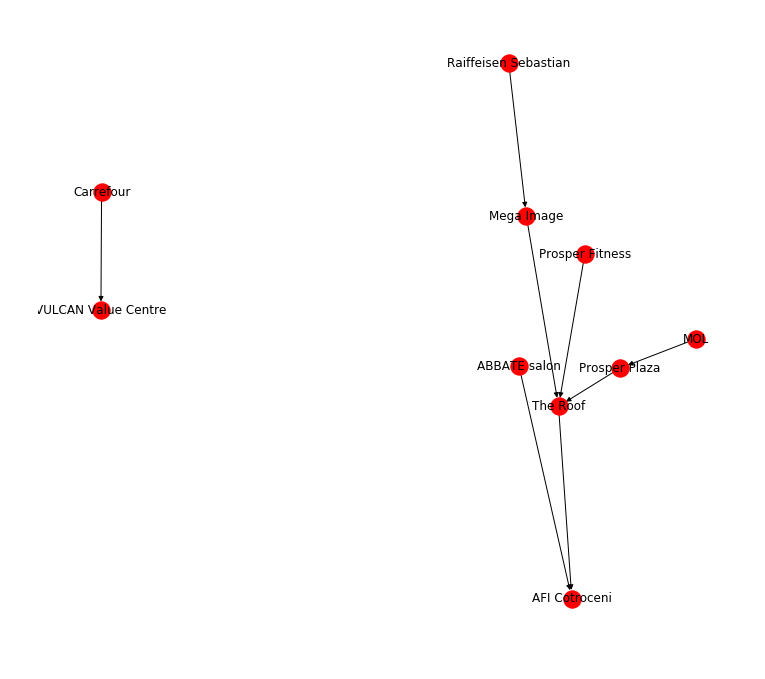

In [43]:
plt.figure(figsize = (10,9))
nx.draw(graph, with_labels=True)
plt.show()

# Plot the network with Basemap:

https://towardsdatascience.com/catching-that-flight-visualizing-social-network-with-networkx-and-basemap-ce4a0d2eaea6

In [60]:
plt.figure(figsize = (10,9))

m = Basemap(projection='merc',llcrnrlon=44,llcrnrlat=26,urcrnrlon=45,

urcrnrlat=27, lat_ts=0, resolution='l',suppress_ticks=True)

<Figure size 720x648 with 0 Axes>

In [82]:
#import locations
locations = pd.read_csv(r'/home/floriancartuta/LEARN/COURSERA/Applied Data Science Capstone/Proiect_final/locations.csv')
locations

,Name,Categ,id,lat,lng
0,ABBATE salon,Salon / Barbershop,4c4716cd417b20a11f68dca9,44.420111,26.063879
1,AFI Cotroceni,Shopping Mall,4ba79045f964a520c79d39e3,44.430827,26.052918
2,Carrefour,Department Store,5407ec17498e5458a8a4d1bf,44.418093,26.072153
3,Mega Image,Supermarket,4c94d3ed94a0236abef68f12,44.420332,26.066003
4,MOL,Gas Station,4d14cf30401db60cdf4ddba4,44.420797,26.065114
5,Prosper Fitness,Gym / Fitness Center,4e528116ae6054e936229adf,44.420153,26.065467
6,Prosper Plaza,Department Store,4c7543892db5236a2f74bc79,44.420046,26.065664
7,Raiffeisen Sebastian,Bank,4e3a4ea3aeb7ec67028b2170,44.420208,26.066173
8,The Roof,Restaurant,4e9870e1775bdedf44426987,44.420061,26.066116
9,VULCAN Value Centre,Outlet Mall,5407d878498eef5e68d11aee,44.418130,26.072654


In [110]:
mx, my = m(locations['lng'].values,locations['lat'].values)

pos = {}

for count, elem in enumerate (locations['Name']):

     pos[elem] = (mx[count], my[count])
print(pos.keys())

dict_keys(['ABBATE salon', 'AFI Cotroceni', 'Carrefour', 'Mega Image', 'MOL', 'Prosper Fitness', 'Prosper Plaza', 'Raiffeisen Sebastian', 'The Roof', 'VULCAN Value Centre'])


{'ABBATE salon': 'ABBATE salon',
 'AFI Cotroceni': 'AFI Cotroceni',
 'Carrefour': 'Carrefour',
 'Mega Image': 'Mega Image',
 'MOL': 'MOL',
 'Prosper Fitness': 'Prosper Fitness',
 'Prosper Plaza': 'Prosper Plaza',
 'Raiffeisen Sebastian': 'Raiffeisen Sebastian',
 'The Roof': 'The Roof',
 'VULCAN Value Centre': 'VULCAN Value Centre'}

In [98]:
labels_dict = dict(zip(locations['Name'].values, locations['Name'].values))

In [112]:
pos=nx.spring_layout(G=graph) # positions for all nodes

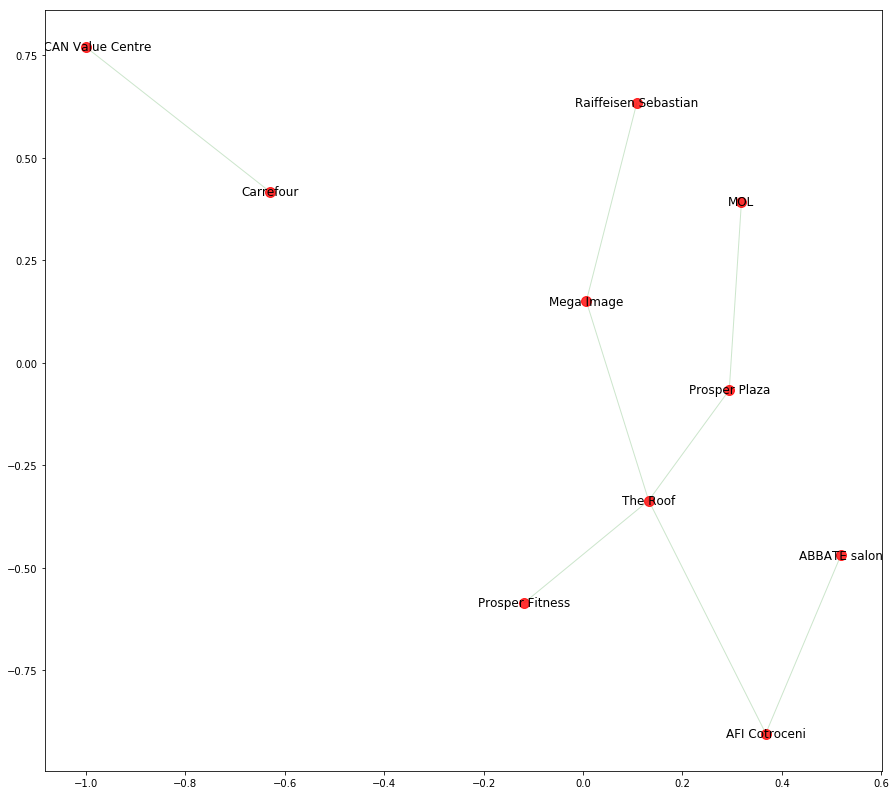

In [113]:
plt.figure(figsize = (15,14))
nx.draw_networkx_nodes(G = graph, pos = pos, node_list = graph.nodes(),node_color = 'r', alpha = 0.8, node_size = 100, with_labels=True)
nx.draw_networkx_edges(G = graph, pos = pos, edge_color='g', alpha=0.2, arrows = False)
nx.draw_networkx_labels(G= graph,pos=pos,labels=labels_dict)
plt.show()

{'MOL': array([0.04424905, 0.03984119]),
 'Prosper Plaza': array([0.12576841, 0.16643941]),
 'ABBATE salon': array([-0.04485976,  0.3417206 ]),
 'AFI Cotroceni': array([-0.06026121,  0.50709244]),
 'Mega Image': array([0.20964072, 0.20965578]),
 'The Roof': array([0.09242672, 0.42784062]),
 'Carrefour': array([-0.41781319, -0.94789663]),
 'VULCAN Value Centre': array([-0.54578248, -1.        ]),
 'Prosper Fitness': array([0.29229629, 0.24025334]),
 'Raiffeisen Sebastian': array([0.30433546, 0.01505325])}